# Import packages / set global variables

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model

import statsmodels.formula.api as smf

# %matplotlib inline

In [2]:
# setting directories for data i/o

data_directory = 'C:/Users/charl/Documents/CNT 2020/Evictions/cnt-evictions/data/'
export_directory = 'C:/Users/charl/Documents/CNT 2020/Evictions/cnt-evictions/analysis/exports/'

analysis_data_file_name = 'joined_analysis_df_20200405_0000.csv'

In [3]:
# updating pandas view settings

pd.set_option('display.max_columns', 999)

export_files = False

# Import cleaned data analysis dataset

In [4]:
analysis_df = pd.read_csv(data_directory+analysis_data_file_name, low_memory=False)

In [20]:
analysis_df.head()

,Unnamed: 0,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


# Pyplot

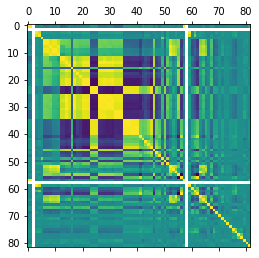

In [6]:
# import matplotlib.pyplot as plt

plt.matshow(analysis_df.corr())
plt.show()

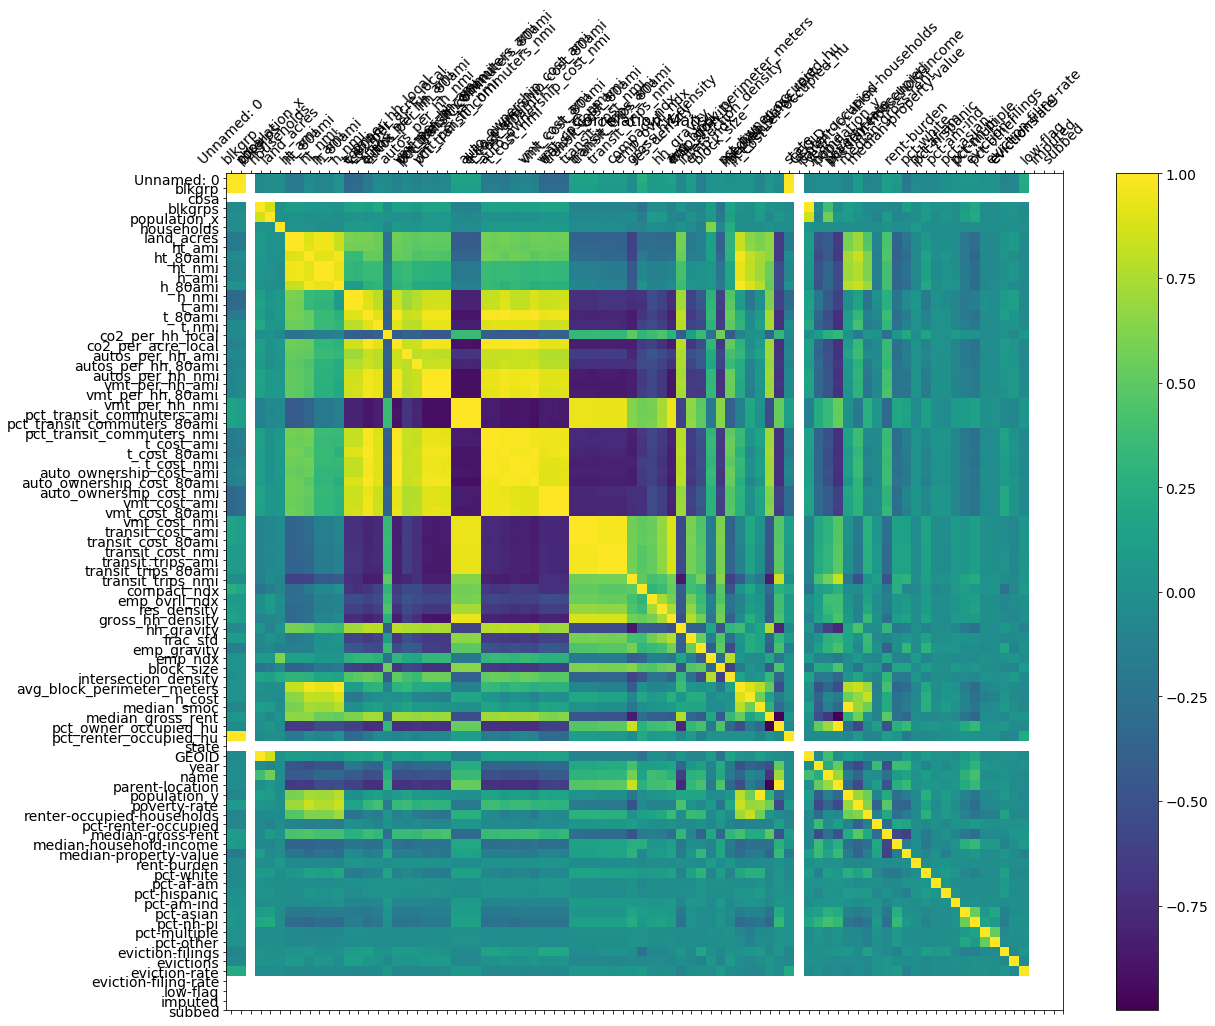

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(analysis_df.corr(), fignum=f.number)
plt.xticks(range(analysis_df.shape[1]), analysis_df.columns, fontsize=14, rotation=45)
plt.yticks(range(analysis_df.shape[1]), analysis_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Filter DF

In [10]:
analysis_df.columns

Index(['Unnamed: 0', 'blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households',
       'land_acres', 'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami',
       'h_nmi', 't_ami', 't_80ami', 't_nmi', 'co2_per_hh_local',
       'co2_per_acre_local', 'autos_per_hh_ami', 'autos_per_hh_80ami',
       'autos_per_hh_nmi', 'vmt_per_hh_ami', 'vmt_per_hh_80ami',
       'vmt_per_hh_nmi', 'pct_transit_commuters_ami',
       'pct_transit_commuters_80ami', 'pct_transit_commuters_nmi',
       't_cost_ami', 't_cost_80ami', 't_cost_nmi', 'auto_ownership_cost_ami',
       'auto_ownership_cost_80ami', 'auto_ownership_cost_nmi', 'vmt_cost_ami',
       'vmt_cost_80ami', 'vmt_cost_nmi', 'transit_cost_ami',
       'transit_cost_80ami', 'transit_cost_nmi', 'transit_trips_ami',
       'transit_trips_80ami', 'transit_trips_nmi', 'compact_ndx',
       'emp_ovrll_ndx', 'res_density', 'gross_hh_density', 'hh_gravity',
       'frac_sfd', 'emp_gravity', 'emp_ndx', 'block_size',
       'intersection_density', 'avg_blo

In [19]:
correlation_columns = ['ht_ami', 'h_ami', 't_ami', 'h_cost', 't_cost_ami', 'co2_per_hh_local','co2_per_acre_local', 'autos_per_hh_ami',  'vmt_per_hh_ami', 'pct_transit_commuters_ami',  'auto_ownership_cost_ami', 'vmt_cost_ami', 'transit_cost_ami', 'transit_trips_ami', 'compact_ndx', 'emp_ovrll_ndx', 'res_density', 'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx', 'block_size', 'intersection_density', 'avg_block_perimeter_meters',  'median_smoc', 'median_gross_rent', 'pct_owner_occupied_hu', 'pct_renter_occupied_hu', 'poverty-rate', 'renter-occupied-households', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'eviction-filings', 'evictions', 'eviction-rate', 'eviction-filing-rate']

In [15]:
skinny_analysis_df = analysis_df[correlation_columns].copy()

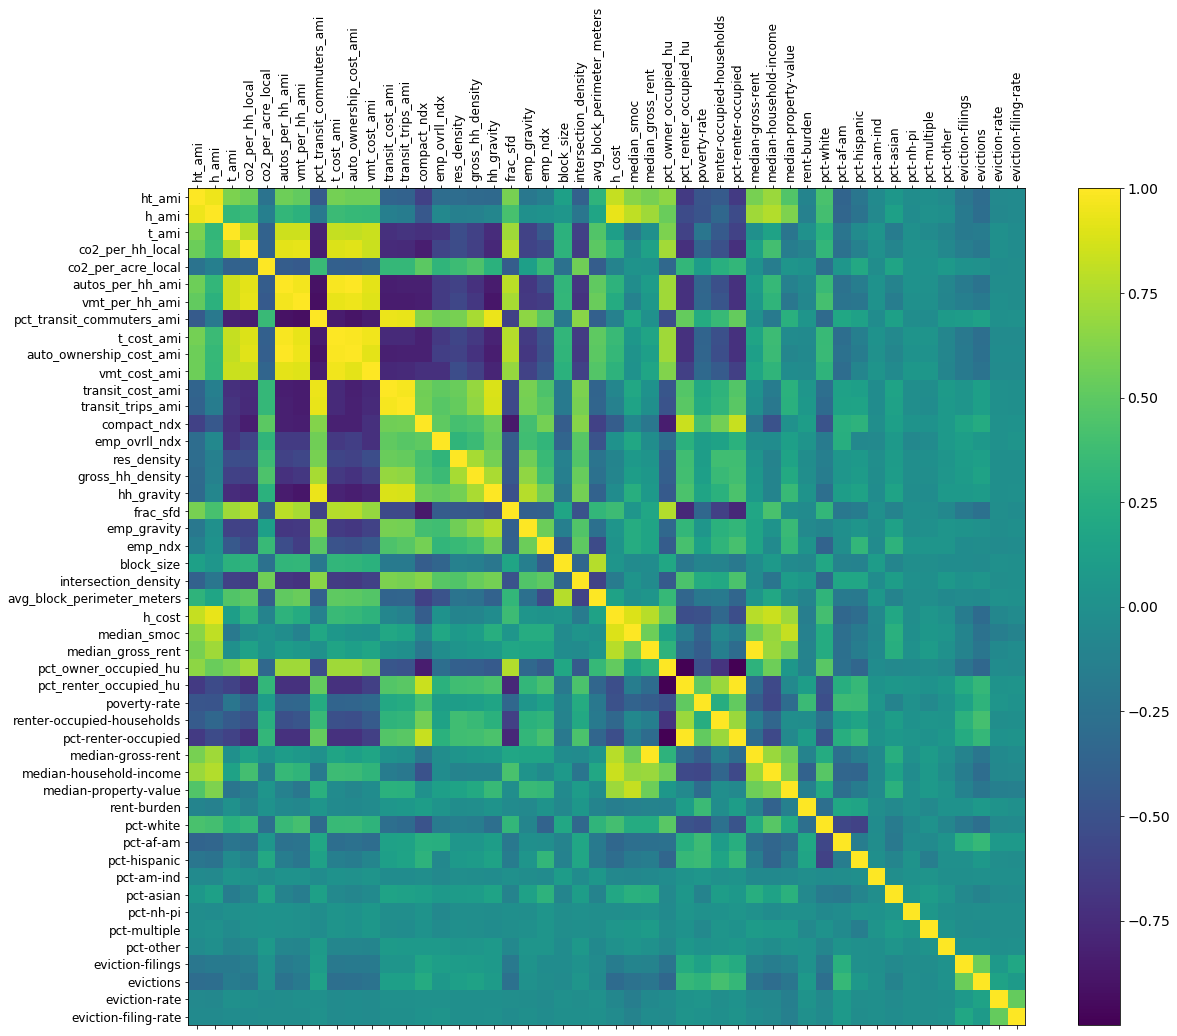

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(skinny_analysis_df.corr(), fignum=f.number)
plt.xticks(range(skinny_analysis_df.shape[1]), skinny_analysis_df.columns, fontsize=12, rotation=90)
plt.yticks(range(skinny_analysis_df.shape[1]), skinny_analysis_df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);
plt.savefig(export_directory+'correlation_matrix', format='png')

In [23]:
skinny_analysis_df.corr().to_csv(export_directory+'correlation_matrix.csv')

# Collinearity Test